# Titanic Survival Prediction Model

<b>RMS Titanic</b> was a British passenger liner, operated by the White Star Line, which sank in the North Atlantic Ocean on 15 April 1912 after striking an iceberg during her maiden voyage from Southampton, UK, to New York City. Of the estimated 2,224 passengers and crew aboard, more than 1,500 died, which made the sinking possibly one of the deadliest for a single ship up to that time. It remains to this day the deadliest peacetime sinking of a superliner or cruise ship. (Wikipedia)

This is the submission for Titanic Machine Learning Task on Kaggle. This notebook analyses the titanic dataset of passengers and looks at the accuracy score of different models for classificaton of survival of passengers selecting the best model for predicting the survival.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv("titanic/train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Analysis of passengers in Titanic and preprocessing

We apply basic preprocessing to our dataset and analyse the various features in the dataset e.g. Passengers' Sex, Age, Survival rate, etc. We replace null values with mean or mode depending on the feature type and represent the features using the pie charts

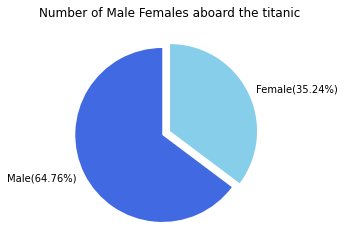

In [2]:
plt.pie([len(df[df["Sex"]=='male']),len(df[df["Sex"]=='female'])], 
        labels=["Male({:.2f}%)".format((len(df[df["Sex"]=='male'])/len(df["Sex"]))*100),
                "Female({:.2f}%)".format((len(df[df["Sex"]=='female'])/len(df["Sex"]))*100)], explode=[0.1,0],
        startangle=90,colors=["royalblue","skyblue"])
plt.title("Number of Male Females aboard the titanic")
plt.show()

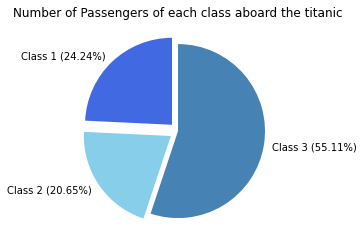

In [3]:
plt.pie([len(df[df["Pclass"]==1]),len(df[df["Pclass"]==2]),len(df[df["Pclass"]==3])], 
        labels=["Class 1 ({:.2f}%)".format((len(df[df["Pclass"]==1])/len(df["Pclass"]))*100),
                "Class 2 ({:.2f}%)".format((len(df[df["Pclass"]==2])/len(df["Pclass"]))*100),
                "Class 3 ({:.2f}%)".format((len(df[df["Pclass"]==3])/len(df["Pclass"]))*100)], explode=[0.1,0.1,0],
        startangle=90,colors=["royalblue","skyblue", "steelblue"])
plt.title("Number of Passengers of each class aboard the titanic")
plt.show()

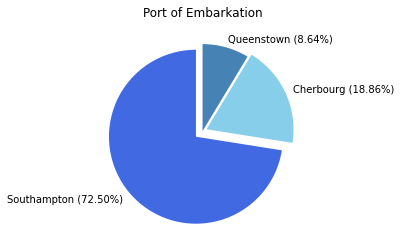

In [4]:
df["Embarked"]=df["Embarked"].fillna(value="S")

plt.pie([len(df[df["Embarked"]=='S']),len(df[df["Embarked"]=='C']),len(df[df["Embarked"]=='Q'])], 
        labels=["Southampton ({:.2f}%)".format((len(df[df["Embarked"]=='S'])/len(df["Embarked"]))*100),
                "Cherbourg ({:.2f}%)".format((len(df[df["Embarked"]=='C'])/len(df["Embarked"]))*100),
                "Queenstown ({:.2f}%)".format((len(df[df["Embarked"]=='Q'])/len(df["Embarked"]))*100)], explode=[0.1,0.05,0],
        startangle=90,colors=["royalblue","skyblue", "steelblue"])
plt.title("Port of Embarkation")
plt.show()

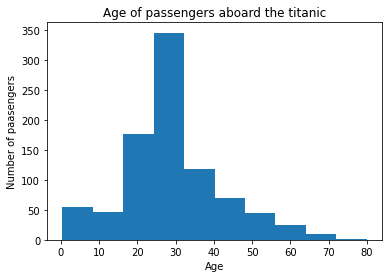

In [5]:
df["Age"]=df["Age"].fillna(value=np.nanmean(df["Age"]))

plt.hist(df["Age"])
plt.title("Age of passengers aboard the titanic")
plt.xlabel("Age")
plt.ylabel("Number of paasengers")
plt.show()

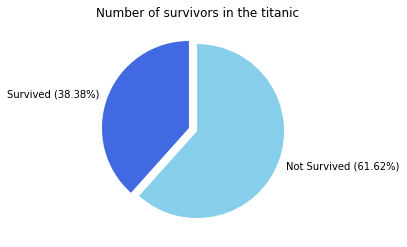

In [6]:
plt.pie([len(df[df["Survived"]==1]),len(df[df["Survived"]==0])],
        labels=["Survived ({:.2f}%)".format((len(df[df["Survived"]==1])/len(df["Survived"]))*100),
                "Not Survived ({:.2f}%)".format((len(df[df["Survived"]==0])/len(df["Survived"]))*100) ], explode=[0.1,0],
        startangle=90,colors=["royalblue","skyblue"])
plt.title("Number of survivors in the titanic")
plt.show()

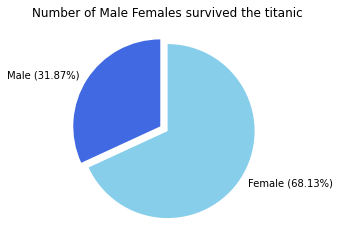

In [7]:
dt=df[df["Survived"]==1]
plt.pie([len(dt[dt["Sex"]=='male']),len(dt[dt["Sex"]=='female'])], 
        labels=["Male ({:.2f}%)".format((len(dt[dt["Sex"]=='male'])/len(dt))*100), 
                "Female ({:.2f}%)".format((len(dt[dt["Sex"]=='female'])/len(dt))*100)], explode=[0.1,0],
        startangle=90,colors=["royalblue","skyblue"])
plt.title("Number of Male Females survived the titanic")
plt.show()

# Splitting the data

We now split the data and apply label encoding to the sex and embarked column.

In [8]:
feature_names=["Pclass", "Age", "Sex", "SibSp", "Parch", "Embarked"]
X=df[feature_names]
X

,Pclass,Age,Sex,SibSp,Parch,Embarked
0,3,22.000000,male,1,0,S
1,1,38.000000,female,1,0,C
2,3,26.000000,female,0,0,S
3,1,35.000000,female,1,0,S
4,3,35.000000,male,0,0,S
...,...,...,...,...,...,...
886,2,27.000000,male,0,0,S
887,1,19.000000,female,0,0,S
888,3,29.699118,female,1,2,S
889,1,26.000000,male,0,0,C


In [9]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
X["Sex"]=label_encoder.fit_transform(X["Sex"])
X["Embarked"]=label_encoder.fit_transform(X["Embarked"])
X

C:\Users\mmana\AppData\Local\Temp/ipykernel_18156/3513374962.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Sex"]=label_encoder.fit_transform(X["Sex"])
C:\Users\mmana\AppData\Local\Temp/ipykernel_18156/3513374962.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Embarked"]=label_encoder.fit_transform(X["Embarked"])


,Pclass,Age,Sex,SibSp,Parch,Embarked
0,3,22.000000,1,1,0,2
1,1,38.000000,0,1,0,0
2,3,26.000000,0,0,0,2
3,1,35.000000,0,1,0,2
4,3,35.000000,1,0,0,2
...,...,...,...,...,...,...
886,2,27.000000,1,0,0,2
887,1,19.000000,0,0,0,2
888,3,29.699118,0,1,2,2
889,1,26.000000,1,0,0,0


In [10]:
y=df["Survived"]
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=0)

# Machine Learning Models and their Accuracy

We will use many machine learning models and select the best out of them on the basis of accuracy score. The models would be:
- Logistic Regression
- Random Forest Classifier
- Naive Bayes Classifier
- Decision Tree Classifier
- Support Vector Machines
- Gradient Boosted Clssifier

### Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg=LogisticRegression().fit(X_train, y_train)
y_pred_logreg=logreg.predict(X_test)

accuracy_score(y_test,y_pred_logreg)

0.7937219730941704

### Random Forest Classifier

In [13]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(n_estimators=10, max_depth=5).fit(X_train, y_train)
y_pred_rfc=rfc.predict(X_test)

accuracy_score(y_test,y_pred_rfc)

0.8026905829596412

### Naive Bayes Classifier

In [14]:
from sklearn.naive_bayes import GaussianNB

gnb=GaussianNB().fit(X_train, y_train)
y_pred_gnb=gnb.predict(X_test)

accuracy_score(y_test,y_pred_gnb)

0.7847533632286996

### Decision Tree Classifier

In [15]:
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier(max_depth=5).fit(X_train, y_train)
y_pred_dtc=dtc.predict(X_test)

accuracy_score(y_test,y_pred_dtc)

0.8071748878923767

### Support  Vector Machines ( SVM )

In [16]:
from sklearn.svm import SVC

svc=SVC(kernel='linear').fit(X_train, y_train)
y_pred_svc=svc.predict(X_test)

accuracy_score(y_test,y_pred_svc)

0.7802690582959642

### Gradient Boosted Classifier

In [17]:
from sklearn.ensemble import GradientBoostingClassifier

gbc=GradientBoostingClassifier(n_estimators=10, max_depth=5, learning_rate=0.3).fit(X_train, y_train)
y_pred_gbc=gbc.predict(X_test)

accuracy_score(y_test,y_pred_gbc)

0.8430493273542601

As we can see that the <b>Gradient Boosting Classifier</b> has the most accuracy among all the classifiers with an verall accuracy score of around 84%. So we will use the Gradient Boosting Classifier to predict the survival of passengers in Titanic.

# Apllying Gradient Boosting Classifier on Test.csv

Applying Gradient Boosting Classifier on whole train.csv dataset

In [19]:
grad_boost=GradientBoostingClassifier(n_estimators=10, max_depth=5, learning_rate=0.3).fit(X, y)

In [21]:
df_test=pd.read_csv("titanic/test.csv")
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [27]:
feature_names=["Pclass", "Age", "Sex", "SibSp", "Parch", "Embarked"]
X_testing=df_test[feature_names]
X_testing

,Pclass,Age,Sex,SibSp,Parch,Embarked
0,3,34.50000,male,0,0,Q
1,3,47.00000,female,1,0,S
2,2,62.00000,male,0,0,Q
3,3,27.00000,male,0,0,S
4,3,22.00000,female,1,1,S
...,...,...,...,...,...,...
413,3,30.27259,male,0,0,S
414,1,39.00000,female,0,0,C
415,3,38.50000,male,0,0,S
416,3,30.27259,male,0,0,S


In [28]:
df_test["Embarked"]=df_test["Embarked"].fillna(value="S")
df_test["Age"]=df_test["Age"].fillna(value=np.nanmean(df_test["Age"]))
X_testing["Sex"]=label_encoder.fit_transform(X_testing["Sex"])
X_testing["Embarked"]=label_encoder.fit_transform(X_testing["Embarked"])
X_testing

C:\Users\mmana\AppData\Local\Temp/ipykernel_18156/1417429083.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_testing["Sex"]=label_encoder.fit_transform(X_testing["Sex"])
C:\Users\mmana\AppData\Local\Temp/ipykernel_18156/1417429083.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_testing["Embarked"]=label_encoder.fit_transform(X_testing["Embarked"])


,Pclass,Age,Sex,SibSp,Parch,Embarked
0,3,34.50000,1,0,0,1
1,3,47.00000,0,1,0,2
2,2,62.00000,1,0,0,1
3,3,27.00000,1,0,0,2
4,3,22.00000,0,1,1,2
...,...,...,...,...,...,...
413,3,30.27259,1,0,0,2
414,1,39.00000,0,0,0,0
415,3,38.50000,1,0,0,2
416,3,30.27259,1,0,0,2


In [29]:
y_predict=grad_boost.predict(X_testing)
y_predict

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [32]:
y_predict.shape

(418,)

In [34]:
df_test["Survived"]=y_predict
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C105,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",male,30.27259,0,0,359309,8.0500,NaN,S,0


In [40]:
col=["PassengerId", "Survived"]
kaggle_inp=df_test[col]
kaggle_inp=kaggle_inp.set_index("PassengerId")
kaggle_inp

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,0
...,...
1305,0
1306,1
1307,0


In [38]:
kaggle_inp.to_csv("Titani_Survival_Prediction.csv")